In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('desktop/mushrooms.csv')

In [4]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# summary of data set

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [7]:
data.describe(include='all')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


# missing value

In [8]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

there are  no missing value

In [9]:
# count plot of target variable class

<AxesSubplot:xlabel='class', ylabel='count'>

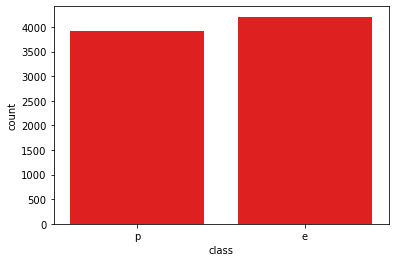

In [10]:
sns.countplot(data['class'],color='red')

In [11]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [12]:
data['class'].value_counts(normalize=True)

e    0.517971
p    0.482029
Name: class, dtype: float64

In [13]:
# 51 % mushrooms are edible 
# 48% mushrooms are poisonous 

In [14]:
#countplot of population of mushrooms

<AxesSubplot:xlabel='population', ylabel='count'>

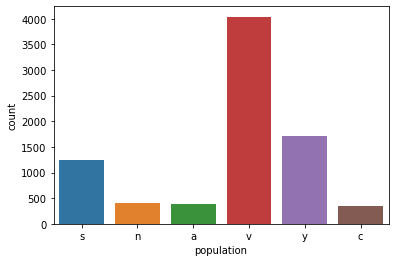

In [15]:
sns.countplot(data['population'])

In [16]:
(data['population'].value_counts(normalize = True)*100).round(1)

v    49.7
y    21.1
s    15.4
n     4.9
a     4.7
c     4.2
Name: population, dtype: float64

several population of mushrooms is  high  population %   
clustered population of mushrooms is very low population %

In [17]:
# countplot of habitat

<AxesSubplot:xlabel='habitat', ylabel='count'>

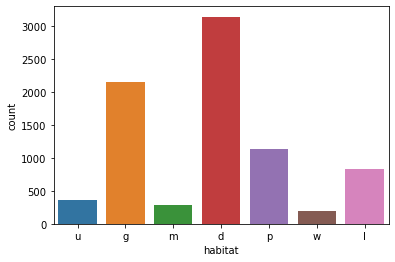

In [18]:
sns.countplot(data['habitat'])

In [19]:
(data['habitat'].value_counts(normalize= True)*100).round(2)

d    38.75
g    26.44
p    14.08
l    10.24
u     4.53
m     3.59
w     2.36
Name: habitat, dtype: float64

38.75% mushrooms are found in  woods, 26.44% found in grass
and least % mushrooms are found in waste it's 2.36

# splitting dataset

In [20]:
x=data.drop('class', axis=1)
y=data['class']

# one hot encoding

In [21]:
X=pd.get_dummies(x)
X

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)


In [23]:
x_train.shape

(6499, 117)

In [24]:
x_test.shape

(1625, 117)

# fitting gaussian naive bayes to the traninig set

In [25]:
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(x_train,y_train)

GaussianNB()

In [26]:
# predection result

In [27]:
y_pred=gb.predict(x_test)

In [28]:
y_pred

array(['e', 'p', 'p', ..., 'p', 'p', 'p'], dtype='<U1')

In [29]:
# make the confussion matrix to find how many missleading value
from sklearn.metrics import confusion_matrix
print('confusion matrix:',confusion_matrix(y_test,y_pred))


confusion matrix: [[778  65]
 [  0 782]]


65 missing value

In [30]:
# model is created and check for the performance of the model
from sklearn.metrics import accuracy_score
print('accurcy score:',accuracy_score(y_test,y_pred))

accurcy score: 0.96


# fitting Bernoulli nave bayes to the traning set

In [31]:
from sklearn.naive_bayes import  BernoulliNB
bn=BernoulliNB()
bn.fit(x_test,y_test)

BernoulliNB()

In [32]:
y_pred=bn.predict(x_test)
y_pred

array(['e', 'p', 'p', ..., 'p', 'p', 'p'], dtype='<U1')

In [33]:
print('confusion matrix:',confusion_matrix(y_test,y_pred))
print('accurcy score:',accuracy_score(y_test,y_pred))

confusion matrix: [[829  14]
 [ 98 684]]
accurcy score: 0.931076923076923


112 missing value and accuarcy is 93%

# support vector machine svm

# Linear SVM

In [34]:
from sklearn.svm import SVC

In [35]:
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [36]:
pred=svm.predict(x_test)

In [37]:
print('accurcy score:',accuracy_score(y_test,pred))
print('confusion matrix:',confusion_matrix(y_test,pred))


accurcy score: 1.0
confusion matrix: [[843   0]
 [  0 782]]


# Polinominal SVM

In [38]:
from sklearn.svm import SVC

In [39]:
svm_poly=SVC(kernel='poly',degree=3)
model=svm_poly.fit(x_train,y_train)
pred=model.predict(x_test)

In [40]:
print('accurcy score:',accuracy_score(y_test,pred))
print('confusion matrix:',confusion_matrix(y_test,pred))


accurcy score: 1.0
confusion matrix: [[843   0]
 [  0 782]]


# Radial SVM

In [41]:
svm_rbf=SVC(kernel='rbf')
model=svm_rbf.fit(x_train,y_train)
pred=model.predict(x_test)

In [42]:
print('accurcy score:',accuracy_score(y_test,pred))
print('confusion matrix:',confusion_matrix(y_test,pred))


accurcy score: 1.0
confusion matrix: [[843   0]
 [  0 782]]


# AdaBoostClassifier

In [43]:
from sklearn.ensemble import AdaBoostClassifier

In [44]:
ab=AdaBoostClassifier()

In [45]:
ab.fit(x_train,y_train)

AdaBoostClassifier()

In [46]:
# predection result

In [47]:
y_pred=ab.predict(x_test)

In [48]:
y_pred

array(['e', 'p', 'p', ..., 'p', 'p', 'p'], dtype=object)

In [49]:
print('accurcy score:',accuracy_score(y_test,pred))
print('confusion matrix:',confusion_matrix(y_test,pred))


accurcy score: 1.0
confusion matrix: [[843   0]
 [  0 782]]


In [50]:
#AdaBoostClassifier predict zero miss classification in class